#### 1.订单表的长度，shape，columns
#### 2.统计菜名的平均价格（amounts）
#### 3.什么菜最受欢迎
#### 4.哪个订单ID点的菜最多
#### ...

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
%matplotlib inline
# 1.加载数据
data1 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail1')
data2 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail2')
data3 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail3')
# 2.数据预处理（合并数据,NA等处理），分析数据
data = pd.concat([data1,data2,data3],axis=0)  #按照行进行拼接数据
# data.head(5)
data.dropna(axis=1,inplace=True) #按照列删除na列，并且修改源数据
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [4]:
#统计卖出菜品的平均价格
round(data['amounts'].mean(),2)  #方法一：pandas自带函数
round(np.mean(data['amounts']),2)  #方法二：numpy函数处理

44.82

In [109]:
# 频数统计，什么菜最受欢迎  （对菜名进行频数统计，取最大前10名）
dishes_count = data['dishes_name'].value_counts()[:10]
# print(dishes_count)
# 3. 数据可视化matplotlib
dishes_count
# dishes_count.plot(kind='line',color=['r'])
# dishes_count.plot(kind='bar',fontsize=16)
# for x,y in enumerate(dishes_count):
#     print(x,y)
#     plt.text(x,y+2,y,ha='center',fontsize=12)

白饭/大碗        323
凉拌菠菜         269
谷稻小庄         239
麻辣小龙虾        216
辣炒鱿鱼         189
芝士烩波士顿龙虾     188
五色糯米饭(七色)    187
白饭/小碗        186
香酥两吃大虾       178
焖猪手          173
Name: dishes_name, dtype: int64

Text(0, 0.5, '点菜种类')

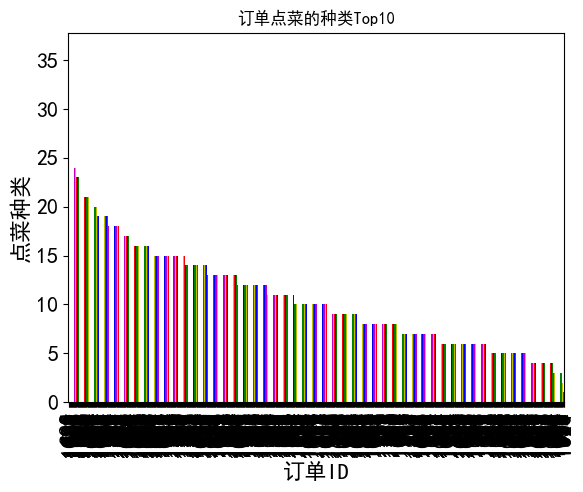

In [6]:
#订单点菜的种类最多（1，1，1    1，2，3）
data_group = data['order_id'].value_counts()[:]
data_group.plot(kind='bar',fontsize=16,color=['r','m','b','y','g'])
plt.title('订单点菜的种类Top10')
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('点菜种类',fontsize=16)
# 8月份餐厅订单点菜种类前10名，平均点菜25个菜品

C:\Users\walker\AppData\Local\Temp\ipykernel_11428\3576002870.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sort_counts['counts'][:10].plot(kind='bar',fontsize=16)


Text(0.5, 1.0, '订单ID点菜数量Top10')

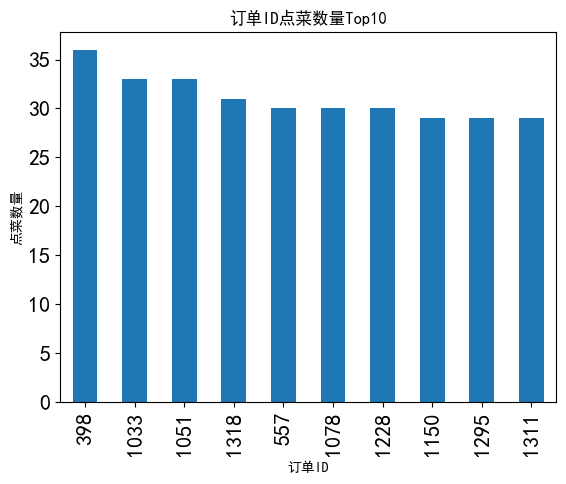

In [111]:
#订单ID点菜数量Top10（分组order_id,counts求和，排序，前十）
data['total_amounts'] =data['counts']*data['amounts']  #统计单道菜消费总额
dataGroup = data[['order_id','counts','amounts','total_amounts']].groupby(by='order_id')
Group_sum = dataGroup.sum()  #分组求和
sort_counts = Group_sum.sort_values(by='counts',ascending=False)
sort_counts['counts'][:10].plot(kind='bar',fontsize=16)
plt.xlabel('订单ID')
plt.ylabel('点菜数量')
plt.title('订单ID点菜数量Top10')
#8月份订单点菜数量前10名

C:\Users\walker\AppData\Local\Temp\ipykernel_11428\1017417880.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sort_total_amounts['total_amounts'][:10].plot(kind='bar')


Text(0.5, 1.0, '消费金额前10')

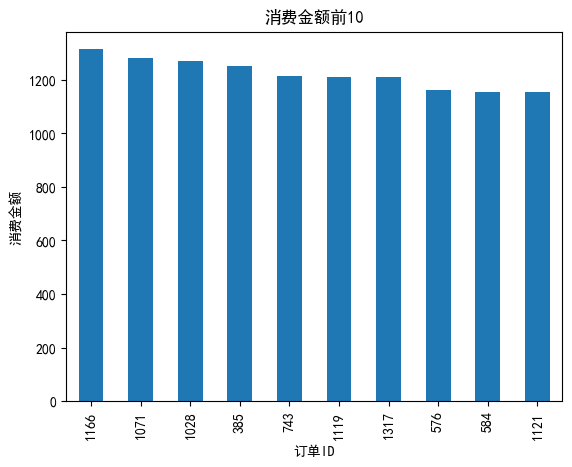

In [113]:
#哪个订单ID吃的钱做多（排序）
sort_total_amounts = Group_sum.sort_values(by='total_amounts',ascending=False)
sort_total_amounts['total_amounts'][:10].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费金额')
plt.title('消费金额前10')

Text(0.5, 1.0, '订单消费单价前10')

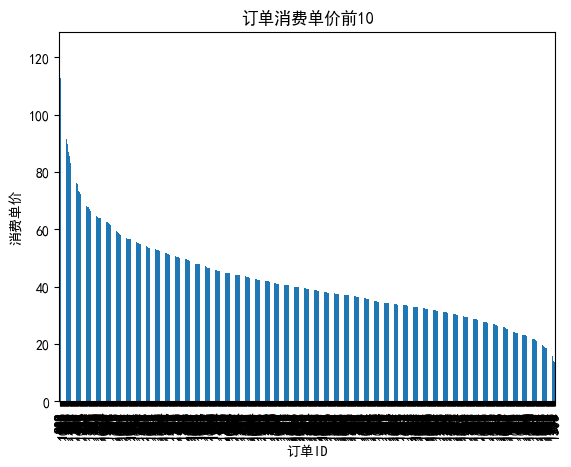

In [132]:
#哪个订单ID平均消费最贵
Group_sum['average'] = Group_sum['total_amounts']/Group_sum['counts']
sort_average = Group_sum.sort_values(by='average',ascending=False)
sort_average['average'][:].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费单价')
plt.title('订单消费单价前10')

Text(0.5, 1.0, '点菜数与小时的关系图')

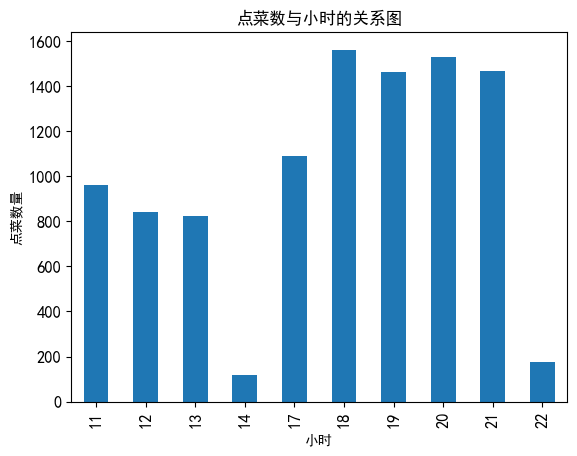

In [133]:
#一天当中什么时间段，点菜量比较集中（hour）
data['hourcount'] = 1 # 新列，用作计数器
data['time'] = pd.to_datetime(data['place_order_time']) #将时间转换成日期类型存储
data['hour'] = data['time'].map(lambda x:x.hour)
gp_by_hour = data.groupby(by='hour').count()['hourcount']
gp_by_hour
# gp_by_hour.plot(kind='line',color=['g'])
gp_by_hour.plot(kind='bar',fontsize=12)
# #gp_by_hour.plot(kind='line',color=['red'])
plt.xlabel('小时')
plt.ylabel('点菜数量')
plt.title('点菜数与小时的关系图')

Text(0.5, 1.0, '点菜数量与日期的关系图')

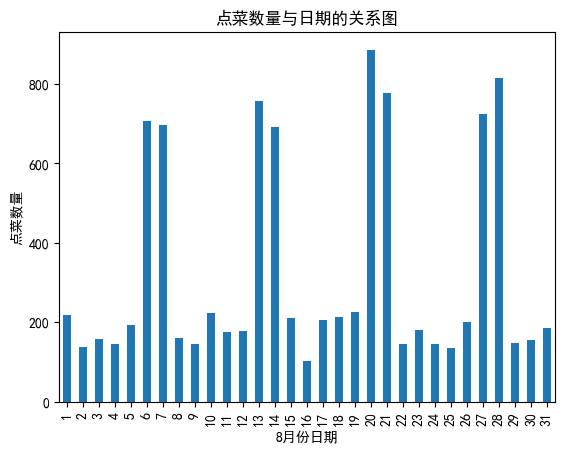

In [135]:
#哪一天订餐数量最多
# data['daycount'] = 1  
data['day'] = data['time'].map(lambda x:x.day)  #解析出天
gp_by_day  = data.groupby(by='day').count()['order_id']
# gp_by_day
gp_by_day.plot(kind='bar')
plt.xlabel('8月份日期')
plt.ylabel('点菜数量')
plt.title('点菜数量与日期的关系图')
#拓展：排序，取点菜量最大的前5天


Text(0.5, 1.0, '点菜数量与星期关系图')

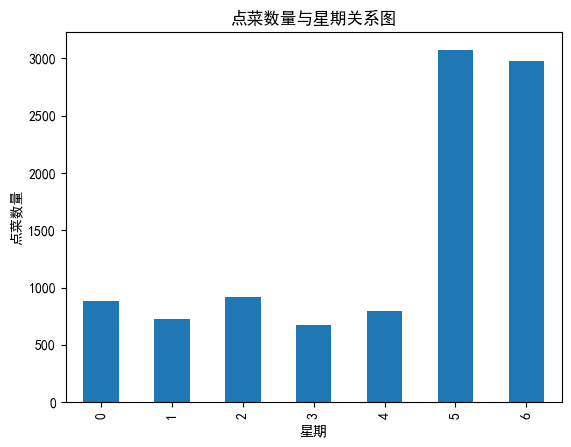

In [134]:
#查看星期几人数最多，订餐数最多，映射数据到星期
data['weekcount'] = 1
data['weekday'] = data['time'].map(lambda x:x.weekday())
gp_by_weekday = data.groupby(by='weekday').count()['weekcount']
gp_by_weekday.plot(kind='bar')
plt.xlabel('星期')
plt.ylabel('点菜数量')
plt.title('点菜数量与星期关系图')